In [1]:
# Set seeds for reproducibility.
from numpy.random import seed
seed(12345)
from tensorflow.random import set_seed
set_seed(67890)

# GOAL: Create a machine learning model to accurately detect fraudulent credit card transactions.

In [2]:
# Import initial libraries and modules.
import pickle

import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load dataset. 
df = pd.read_csv("creditcard.csv")

In [4]:
# Preview data.
# Elements V1-V28 are abstract variables obtained from the dataset originators using PCA to protect card user data.
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
# Perform dropna to see if any rows with NA values exist.
count_1_pd = df.shape[0]
df = df.dropna()
count_2_pd = df.shape[0]
print('Rows before: {}'.format(count_1_pd))
print('Rows after: {}'.format(count_2_pd))

Rows before: 284807
Rows after: 284807


In [6]:
# Drop time column as it was identified by other Kaggle users to be unimportant.
# Split the data into train and test datasets.
df = df.drop(columns=['Time'])
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12345)

In [7]:
# Scale the numeric data in X_train.
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
# Preview scaled X_train.
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.990566,0.738520,0.818409,0.263825,0.784478,0.225160,0.263913,0.785551,0.479178,0.513623,...,0.579150,0.561422,0.512423,0.667953,0.423023,0.569552,0.457684,0.415583,0.404025,0.000971
1,0.992124,0.734115,0.824143,0.180661,0.778982,0.216916,0.261954,0.784485,0.533672,0.489064,...,0.578701,0.559213,0.498536,0.671060,0.467688,0.555398,0.335322,0.417041,0.404722,0.000284
2,0.971878,0.745002,0.835608,0.294948,0.787897,0.231587,0.266577,0.787974,0.453472,0.505896,...,0.576813,0.563736,0.537862,0.665833,0.297028,0.605063,0.394916,0.417654,0.405486,0.000039
3,0.966123,0.726624,0.862393,0.295045,0.773304,0.238917,0.257815,0.791144,0.526093,0.500325,...,0.582948,0.563909,0.533747,0.659696,0.328369,0.600709,0.545207,0.416872,0.406580,0.007255
4,0.943797,0.748094,0.859731,0.255723,0.783407,0.225609,0.270150,0.785349,0.461207,0.493980,...,0.581767,0.557676,0.479268,0.665452,0.322681,0.580899,0.456323,0.416248,0.406041,0.003114


In [8]:
# Save scaler model for later use on test data.
pickle.dump(scaler, open("scaler.pkl", 'wb'))

In [9]:
# Create model evaluation functions.
def get_y_pred(model, x_test):
    return model.predict(x_test)

def get_confusion_matrix(y_test, y_predict):
    cf = confusion_matrix(y_test, y_predict)
    return cf

def get_metrics(cf):
    print("True positive: {}".format(cf[0][0]))
    print("True negative: {}".format(cf[1][1]))
    print("False positive/Type I error: {}".format(cf[1][0]))
    print("False negative/Type II error: {}".format(cf[0][1]))
    print("Sensitivity: {}".format(cf[0][0]/(cf[0][0]+cf[0][1])))
    print("Specificity: {}".format(cf[1][1]/(cf[1][1]+cf[1][0])))
    print("Precision: {}".format(cf[0][0]/(cf[0][0]+cf[1][0])))
    print("Negative predictive value: {}".format(cf[1][1]/(cf[1][1]+cf[0][1])))
    print("False positive rate: {}".format(1 - cf[0][0]/(cf[0][0]+cf[0][1])))
    print("False negative rate: {}".format(1 - cf[1][1]/(cf[1][1]+cf[1][0])))
    print("Accuracy: {}".format((cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[1][0]+cf[0][1])))
    
def get_roc_auc_score(y_test, y_model_predict):
    return print("ROC_AUC score: ",roc_auc_score(y_test, y_model_predict))

In [10]:
# Reload MinMaxScaler and apply to test data.
scalerObj = pickle.load(open("scaler.pkl", 'rb'))
X_test = pd.DataFrame(scalerObj.transform(X_test))

# Model 1 - Logistic Regression.

In [11]:
# Import logistic regression classifier, other helpful modules.
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# Fit model.
model_logistic_regression = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [12]:
# Get predicted labels.
y_pred_logistic_regression = get_y_pred(model_logistic_regression, X_test)
# Get confusion matrix.
cf_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)
print(cf_logistic_regression)

[[85286    12]
 [   71    74]]


In [13]:
# Show confusion matrix derivations.
get_metrics(cf_logistic_regression)
get_roc_auc_score(y_test, y_pred_logistic_regression)

True positive: 85286
True negative: 74
False positive/Type I error: 71
False negative/Type II error: 12
Sensitivity: 0.9998593167483412
Specificity: 0.5103448275862069
Precision: 0.9991681994446853
Negative predictive value: 0.8604651162790697
False positive rate: 0.00014068325165883522
False negative rate: 0.4896551724137931
Accuracy: 0.9990285921608558
ROC_AUC score:  0.7551020721672741


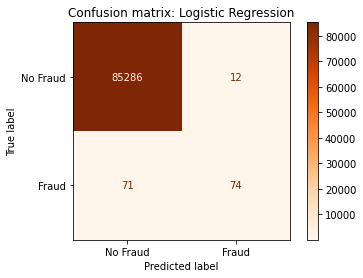

In [14]:
# Replace 0 and 1 with 'No Fraud' and 'Fraud'.
labels = ['No Fraud', 'Fraud']
# Plot confusion matrix.
plot_confusion_matrix(model_logistic_regression, 
                      X_test, 
                      y_test, 
                      display_labels=labels, 
                      cmap=plt.cm.Oranges)
plt.title("Confusion matrix: Logistic Regression")
plt.show()

The sensitivity/recall is pretty good at 99.986%. 

While the model is over 99.9% accurate, it's not that impressive considering the imbalance in the data labels.

The specificity is too low. About half of the fraudulent transactions were flagged as legitimate.

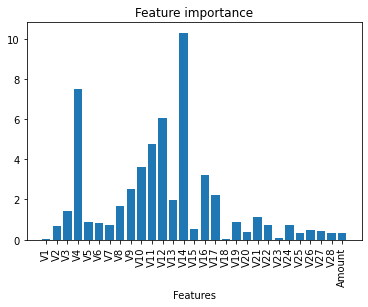

In [15]:
# Additional Logistic Regression analysis - feature importance via model coefficients.
# Get importance.
importance = abs(model_logistic_regression.coef_).squeeze()
# Get variable names.
features = list(df.columns[:-1])
# Plot feature importance.
fig, ax = plt.subplots()
x_pos = np.arange(len(features))
hbars = ax.bar(x_pos, importance, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
ax.set_xlabel('Features')
ax.set_title('Feature importance')

plt.xticks(rotation=90)
plt.show()

Nearly all of the abstracted features are more important than the amount spent in the transaction.

# Model 2 - Random Forest.

In [16]:
# Import random forest classifier.
from sklearn.ensemble import RandomForestClassifier
# Fit model.
model_random_forest = RandomForestClassifier(max_depth=20)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [17]:
# Get predicted labels.
y_pred_random_forest = get_y_pred(model_random_forest, X_test)
# Get confusion matrix.
cf_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print(cf_random_forest)

[[85293     5]
 [   27   118]]


In [18]:
# Show confusion matrix derivations.
get_metrics(cf_random_forest)
get_roc_auc_score(y_test, y_pred_random_forest)

True positive: 85293
True negative: 118
False positive/Type I error: 27
False negative/Type II error: 5
Sensitivity: 0.9999413819784755
Specificity: 0.8137931034482758
Precision: 0.9996835443037975
Negative predictive value: 0.959349593495935
False positive rate: 5.8618021524514674e-05
False negative rate: 0.18620689655172418
Accuracy: 0.9996254813150287
ROC_AUC score:  0.9068672427133756


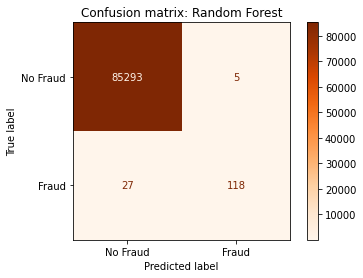

In [19]:
# Plot confusion matrix.
plot_confusion_matrix(model_random_forest, 
                      X_test, 
                      y_test, 
                      display_labels=labels, 
                      cmap=plt.cm.Oranges)
plt.title("Confusion matrix: Random Forest")
plt.show()

Specificity for the Random Forest is at 81.379% - much better than the Logistic Regression's 51.034%.

Accuracy increased from 99.902% to 99.963%.

Sensitivity/recall increased from 99.986% to 99.994%.

AUC increased from 0.75510 to 0.90687.<br><br>

Let's try to ensure the ratio of actual legitimate to actual fraudulent payments is equal across train and test datasets. The dataset is imbalanced as is, with less than 2% of transactions being fraudulent.

# Model 3 - Random Forest w/ Oversampling.

In [20]:
# Import extra modules.
from collections import Counter
from imblearn.over_sampling import SMOTE

In [21]:
# Select optimal oversampling strategy.
oversampling_parameters = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [22]:
oversampling_list = []
for p in oversampling_parameters:
    smt = SMOTE(sampling_strategy=p)
    X_train_SMT, y_train_SMT = smt.fit_resample(X_train, y_train)
    model_rf_SMT = RandomForestClassifier(max_depth=20).fit(X_train_SMT, y_train_SMT)
    model_rf_predict = model_rf_SMT.predict(X_test)
    oversampling_list.append(list([p, roc_auc_score(y_test, model_rf_predict), model_rf_SMT]))

In [23]:
for i in range(len(oversampling_list)):
    print("Parameter:", oversampling_list[i][0])
    print("AUC score:", oversampling_list[i][1])
    print("\n")

Parameter: 0.2
AUC score: 0.9206193135465843


Parameter: 0.25
AUC score: 0.9275217270728747


Parameter: 0.3
AUC score: 0.9309524175284863


Parameter: 0.35
AUC score: 0.9240500040021961


Parameter: 0.4
AUC score: 0.9309582793306387


Parameter: 0.45
AUC score: 0.9205958663379744


Parameter: 0.5
AUC score: 0.9205958663379744




In [24]:
# Select parameter with the highest roc_auc_score.
max_auc = 0
for i in range(len(oversampling_list)):
    if oversampling_list[i][1] > max_auc:
        max_auc = oversampling_list[i][1]
        max_auc_index = i
    else:
        pass
sampling_strategy_over = oversampling_list[max_auc_index][2]
model_random_forest_SMOTE = oversampling_list[max_auc_index][2]
print(oversampling_list[max_auc_index][0:2])

[0.4, 0.9309582793306387]


In [25]:
# Get predicted labels.
y_pred_random_forest_SMOTE = get_y_pred(model_random_forest_SMOTE, X_test)
# Get confusion matrix.
cf_random_forest_SMOTE = confusion_matrix(y_test, y_pred_random_forest_SMOTE)
print(cf_random_forest_SMOTE)

[[85285    13]
 [   20   125]]


In [26]:
# Show confusion matrix derivations.
get_metrics(cf_random_forest_SMOTE)
get_roc_auc_score(y_test, y_pred_random_forest_SMOTE)

True positive: 85285
True negative: 125
False positive/Type I error: 20
False negative/Type II error: 13
Sensitivity: 0.9998475931440362
Specificity: 0.8620689655172413
Precision: 0.9997655471543286
Negative predictive value: 0.9057971014492754
False positive rate: 0.00015240685596384917
False negative rate: 0.13793103448275867
Accuracy: 0.9996137776061234
ROC_AUC score:  0.9309582793306387


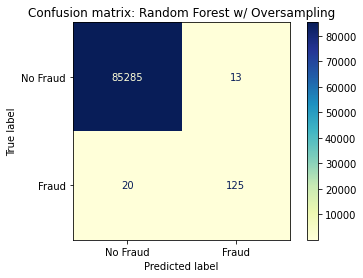

In [27]:
# Plot confusion matrix.
plot_confusion_matrix(model_random_forest_SMOTE, 
                      X_test, 
                      y_test, 
                      display_labels=labels, 
                      cmap=plt.cm.YlGnBu)
plt.title("Confusion matrix: Random Forest w/ Oversampling")
plt.show()

AUC score and specificity were further improved by introducing oversampling, but sensitivity dipped.

# Model 4 - Random Forest w/ Oversampling and Undersampling.

In [28]:
# Import modules for undersampling and pipeline.
from imblearn.pipeline import Pipeline 
from imblearn.under_sampling import RandomUnderSampler

In [29]:
undersampling_parameters = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]

In [30]:
# Select optimal oversampling and undersampling strategy.
overundersampling_list = []
for r in oversampling_parameters:
    for s in undersampling_parameters:
        smt = SMOTE(sampling_strategy=r)
        us = RandomUnderSampler(sampling_strategy=s)
        model_rf_pipe = RandomForestClassifier(max_depth=20)
        pl = Pipeline([
            ('over', smt), 
            ('under', us), 
            ('model', model_rf_pipe)
        ])
        pl.fit(X_train, y_train)
        model_rf_predict_overunder = model_rf_pipe.predict(X_test)
        overundersampling_list.append(list([r, s, roc_auc_score(y_test, model_rf_predict_overunder), model_rf_pipe]))

In [31]:
# Select parameter combination with the highest roc_auc_score.
ax_auc = 0
for i in range(len(overundersampling_list)):
    if overundersampling_list[i][2] > max_auc:
        max_auc = overundersampling_list[i][2]
        max_auc_index = i
    else:
        pass
oversamp_param_2 = overundersampling_list[max_auc_index][0]
undersamp_param = overundersampling_list[max_auc_index][1]
pipeline_overunder = overundersampling_list[max_auc_index][3]
print(overundersampling_list[max_auc_index])

[0.2, 0.6, 0.9377669040224899, RandomForestClassifier(max_depth=20)]


In [32]:
# Get predicted labels.
y_pred_random_forest_pipe = get_y_pred(pipeline_overunder, X_test)
# Get confusion matrix.
cf_random_forest_pipe = confusion_matrix(y_test, y_pred_random_forest_pipe)
print(cf_random_forest_pipe)

[[85270    28]
 [   18   127]]


In [33]:
# Show confusion matrix derivations.
get_metrics(cf_random_forest_pipe)
get_roc_auc_score(y_test, y_pred_random_forest_pipe)

True positive: 85270
True negative: 127
False positive/Type I error: 18
False negative/Type II error: 28
Sensitivity: 0.9996717390794626
Specificity: 0.8758620689655172
Precision: 0.9997889503798894
Negative predictive value: 0.8193548387096774
False positive rate: 0.0003282609205373932
False negative rate: 0.12413793103448278
Accuracy: 0.9994616293903538
ROC_AUC score:  0.9377669040224899


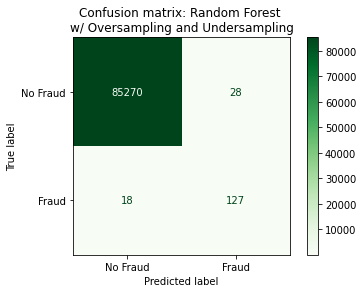

In [34]:
# Plot confusion matrix.
plot_confusion_matrix(pipeline_overunder, 
                      X_test, 
                      y_test, 
                      display_labels=labels, 
                      cmap=plt.cm.Greens)
plt.title("Confusion matrix: Random Forest \nw/ Oversampling and Undersampling")
plt.show()

While specificity increased, overall accuracy decreased due to another drop in sensitivity. False fraud detection could annoy customers and disrupt their non-fraudulent purchases too often. 

AUC score increased, so we will keep the pipeline method of over and undersampling with the same optimal sampling strategy parameters, as it is the preferred metric to be optimized (vs. accuracy) for binary classification models.

# Model 5 - Random Forest w/ Oversampling, Undersampling, and Outlier removal.

In [35]:
# Import OneClassSVM.
from sklearn.svm import OneClassSVM

In [36]:
outliers_list = []
smt = SMOTE(sampling_strategy=oversamp_param_2)
X_train_over, y_train_over = smt.fit_resample(X_train, y_train)
us = RandomUnderSampler(sampling_strategy=s)
X_train_overunder, y_train_overunder = us.fit_resample(X_train_over, y_train_over)
# Select optimal OneClassSVM hyperparameters.
kernel_parameters = ['linear', 'poly', 'rbf', 'sigmoid']
nu_parameters = [0.001, 0.005, 0.01, 0.05, 0.1]
for k in kernel_parameters:
    for n in nu_parameters:
        ou = OneClassSVM(kernel=k, nu=n)
        yh = ou.fit_predict(X_train_overunder)
        # Make y_train_SMOTE a pandas dataframe.
        X_train_ou = X_train_overunder
        y_train_ou = pd.DataFrame(y_train_overunder)
        # Attach y-hat to training data.
        X_train_ou['remove_row'] = yh
        y_train_ou['remove_row'] = yh
        # Remove outliers.
        X_train_ou = X_train_ou[X_train_ou['remove_row'] != -1]
        y_train_ou = y_train_ou[y_train_ou['remove_row'] != -1]
        # Drop remove_row column from training data.
        del X_train_ou['remove_row']
        y_train_ou = y_train_ou['Class']
        # Setup, fit pipeline.
        model_rf_ou = RandomForestClassifier(max_depth=20).fit(X_train_ou, y_train_ou)
        rf_ou_predict = model_rf_ou.predict(X_test)
        outliers_list.append(list([k, n, roc_auc_score(y_test, rf_ou_predict), model_rf_ou]))

In [37]:
# Select best outlier removal parameters.
max_auc = 0
for i in range(len(outliers_list)):
    if outliers_list[i][2] > max_auc:
        max_auc = outliers_list[i][2]
        max_auc_index = i
    else:
        pass
outlier_kernel = outliers_list[max_auc_index][0]
outlier_nu = outliers_list[max_auc_index][1]
model_random_forest_outliers = outliers_list[max_auc_index][3]
print(outliers_list[max_auc_index][0:3])

['linear', 0.01, 0.9411800090716441]


In [38]:
# Get predicted labels.
y_pred_random_forest_outliers = get_y_pred(model_random_forest_outliers, X_test)
# Get confusion matrix.
cf_random_forest_outliers = confusion_matrix(y_test, y_pred_random_forest_outliers)
print(cf_random_forest_outliers)

[[85264    34]
 [   17   128]]


In [39]:
# Show confusion matrix derivations.
get_metrics(cf_random_forest_outliers)
get_roc_auc_score(y_test, y_pred_random_forest_outliers)

True positive: 85264
True negative: 128
False positive/Type I error: 17
False negative/Type II error: 34
Sensitivity: 0.9996013974536332
Specificity: 0.8827586206896552
Precision: 0.999800658997901
Negative predictive value: 0.7901234567901234
False positive rate: 0.0003986025463668108
False negative rate: 0.11724137931034484
Accuracy: 0.999403110845827
ROC_AUC score:  0.9411800090716441


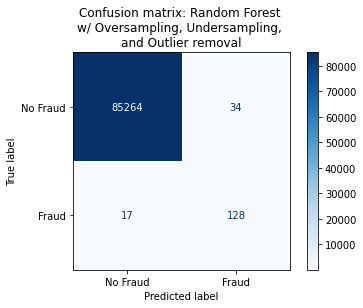

In [40]:
# Plot confusion matrix.
plot_confusion_matrix(model_random_forest_outliers, 
                      X_test, 
                      y_test, 
                      display_labels=labels, 
                      cmap=plt.cm.Blues)
plt.title("Confusion matrix: Random Forest \nw/ Oversampling, Undersampling, \nand Outlier removal")
plt.show()

Removing outliers in the training data led to a better model. We will try this training data now on a deep neural network.

# Model 6 - Keras Deep Neural Net w/ Oversampling, Undersampling, and Outlier removal.

In [41]:
# Import TensorFlow libraries.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [42]:
# Prep training data.
outliers = OneClassSVM(kernel=outlier_kernel, nu=outlier_nu)
yhat = outliers.fit_predict(X_train_overunder)
# Make y_train_SMOTE a pandas dataframe.
X_train_outliers = X_train_overunder
y_train_outliers = pd.DataFrame(y_train_overunder)
# Attach y-hat to training data.
X_train_outliers['remove_row'] = yh
y_train_outliers['remove_row'] = yh
# Remove outliers.
X_train_outliers = X_train_outliers[X_train_outliers.remove_row != -1]
y_train_outliers = y_train_outliers[y_train_outliers.remove_row != -1]
# Drop remove_row column from training data.
del X_train_outliers['remove_row']
y_train_outliers = y_train_outliers['Class']

In [43]:
# Create oversampling neural network.
n_inputs = X_train_outliers.shape[1]

model_tf = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(2, activation='sigmoid')
])
model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 29)                870       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                900       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 32        
Total params: 2,267
Trainable params: 2,267
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile model.
model_tf.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Anaconda\envs\datasci\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [45]:
# Fit TensorFlow model.
history = model_tf.fit(X_train_outliers,
             y_train_outliers,
             validation_split=0.2,
             batch_size=25, 
             epochs=30, 
             shuffle=True, 
             verbose=0)

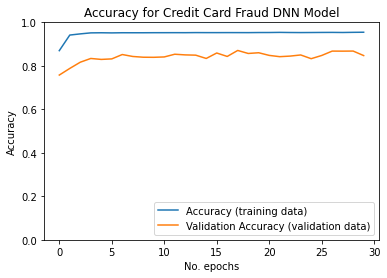

In [46]:
# Plot learning history: Accuracy
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (validation data)')
plt.title('Accuracy for Credit Card Fraud DNN Model')
plt.ylabel('Accuracy')
plt.xlabel('No. epochs')
plt.legend(loc="lower right")
plt.ylim(0, 1)
plt.show()

Accuracy and validation accuracy improved little over the 30 epochs.

In [47]:
# Get predicted values.
y_pred_tf_raw = model_tf.predict(X_test, batch_size=200, verbose=0)

In [48]:
y_pred_tf = []
for i in y_pred_tf_raw:
    if i[0] > i[1]:
        y_pred_tf.append(0)
    else:
        y_pred_tf.append(1)
y_pred_tf = np.array(y_pred_tf, dtype=int)

In [49]:
# Get confusion matrix.
cf_tf = confusion_matrix(y_test, y_pred_tf)
print(cf_tf)

[[84337   961]
 [   14   131]]


In [50]:
# Show confusion matrix derivations.
get_metrics(cf_tf)
get_roc_auc_score(y_test, y_pred_tf)

True positive: 84337
True negative: 131
False positive/Type I error: 14
False negative/Type II error: 961
Sensitivity: 0.9887336162629838
Specificity: 0.903448275862069
Precision: 0.9998340268639376
Negative predictive value: 0.11996336996336997
False positive rate: 0.011266383737016161
False negative rate: 0.096551724137931
Accuracy: 0.9885888838172817
ROC_AUC score:  0.9460909460625263


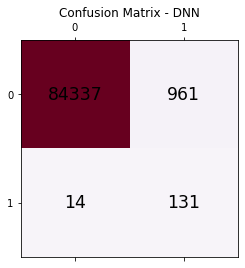

In [51]:
fig, ax = plt.subplots()
ax.matshow(cf_tf, cmap=plt.cm.PuRd)
for i in range(cf_tf.shape[0]):
    for j in range(cf_tf.shape[1]):
        ax.text(x=j, y=i,s=cf_tf[i, j], va='center', ha='center', size='xx-large')
plt.title('Confusion Matrix - DNN')
plt.show()

Let's compare performance of both models.

## Compare models: Random Forest, TensorFlow DNN.

In [52]:
# ROC curves, area-under-curve (AUC) scores for all models using oversampling and outlier removal.\
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

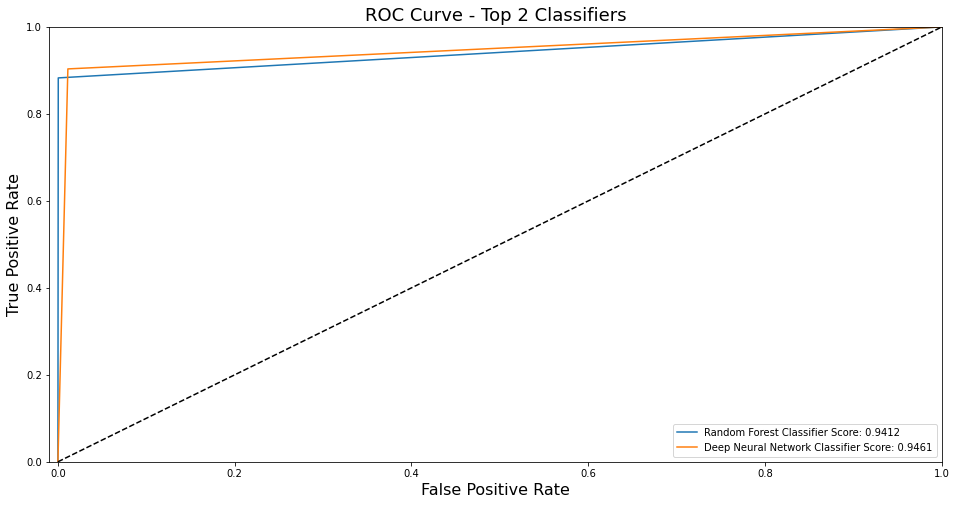

In [53]:
# Generate curves.
random_forest_fpr, random_forest_tpr, random_forest_thresold = roc_curve(y_test, y_pred_random_forest_outliers)
DNN_fpr, DNN_tpr, DNN_threshold = roc_curve(y_test, y_pred_tf)
# Plot ROC curves and roc-AUC-scores/
plt.figure(figsize=(16,8))
plt.plot(random_forest_fpr, random_forest_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_random_forest_outliers)))
plt.plot(DNN_fpr, DNN_tpr, label='Deep Neural Network Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_tf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve - Top 2 Classifiers', fontsize=18)
plt.legend()

The best model from a ROC-AUC perspective is the <b>deep neural net</b>. 

In [54]:
# Save model.
model_tf.save('credit-card-fraud-detection-model')

INFO:tensorflow:Assets written to: credit-card-fraud-detection-model\assets


<b>Dataset citations:</b>


Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook

<b>Sources:</b>
1. https://www.kaggle.com/mlg-ulb/creditcardfraud
2. https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
3. https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb
4. https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
5. https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
6. https://machinelearningmastery.com/calculate-feature-importance-with-python/
